In [1]:
# importing basic libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob ## glob is used to retrieve files 

# set seed
np.random.seed(21)

In [2]:
from PIL import Image

directory_benign_train = "data/train/benign"
directory_malignant_train = "data/train/malignant"
directory_benign_test = "data/test/benign"
directory_malignant_test = "data/test/malignant"


In [3]:
## Loading images and converting them to numpy array using their RGB value
read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))
# np.asarray converts the objects into array/list



In [4]:
# Loading train images
img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]


In [5]:
# Loading test images
img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]


In [6]:
#img_benign_train
type(img_benign_train)


list

In [7]:
# Converting list to numpy array for faster and more convenient operations going forward

X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)


numpy.ndarray

In [8]:
## Creating labels: benign is 0 and malignant is 1

y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train


array([1., 1., 1., ..., 1., 1., 1.])

In [9]:
## Merge data to form complete training and test sets
# axis = 0 means rows

X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0) 
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape) # one image constitutes to (224, 224, 3) and we have 2637 total images in training set
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 224, 224, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 224, 224, 3)
Shape of y_test:  (660,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]


In [11]:
print("Shuffle orders example: ", s1)

Shuffle orders example:  [1410  127 2157 ...  772 1848 1231]


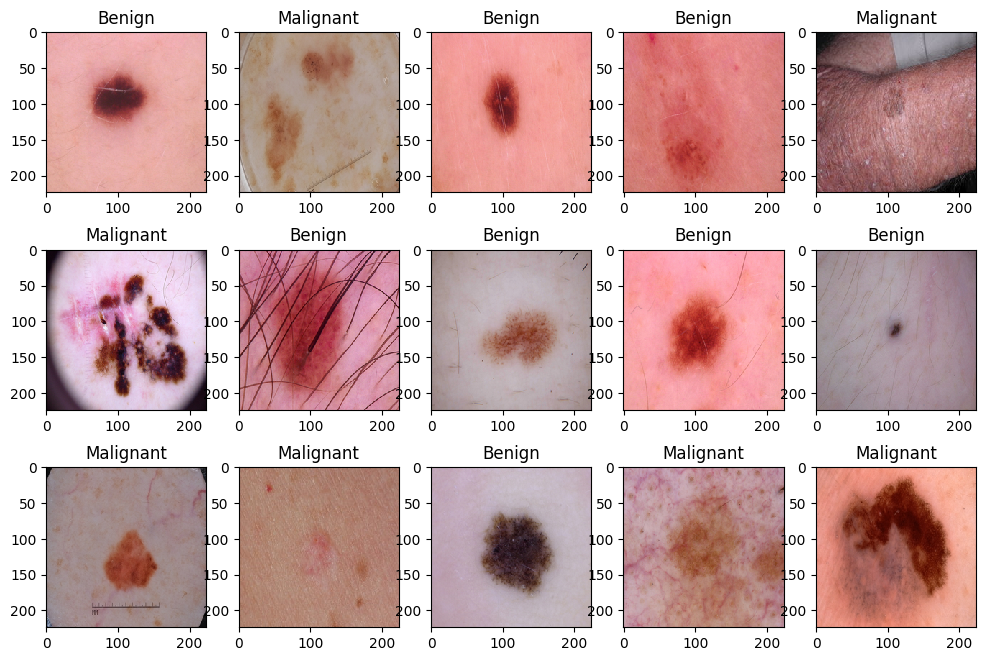

In [12]:
#dISPLAYING THE FIRST FEW IMAGES OF THE DATASET
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [13]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

type(y_train)


numpy.ndarray

In [14]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [15]:
## Normalize by dividing by RGB value
X_train = X_train/255
X_test = X_test/255

In [16]:
import tensorflow as tf

def build_cnn_model(input_shape=(224, 224, 3), num_classes=2):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', input_shape=input_shape, activation='relu', kernel_initializer='glorot_uniform'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    model.summary()

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

    return model


In [17]:
model_cnn = build_cnn_model()


C:\Users\Ishika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,745,730 (98.21 MB)

 Trainable params: 25,745,730 (98.21 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [19]:
learning_rate_annealer = ReduceLROnPlateau(monitor='val_accuracy',  # Change 'val_acc' to 'val_accuracy'
                                          patience=5,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=1e-7)

history = model_cnn.fit(X_train, 
                        y_train, 
                        validation_split=0.2, 
                        epochs=50, 
                        batch_size=64, 
                        verbose=1,
                        callbacks=[learning_rate_annealer])

model_cnn.save("my_cnn_model.h5")

# List all data in history
print(history.history.keys())

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - accuracy: 0.5120 - loss: 1.8252 - val_accuracy: 0.7083 - val_loss: 0.5996 - learning_rate: 0.0010
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 234s 7s/step - accuracy: 0.7609 - loss: 0.5074 - val_accuracy: 0.7538 - val_loss: 0.5462 - learning_rate: 0.0010
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 219s 7s/step - accuracy: 0.7634 - loss: 0.4894 - val_accuracy: 0.7576 - val_loss: 0.5670 - learning_rate: 0.0010
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 231s 7s/step - accuracy: 0.7867 - loss: 0.4501 - val_accuracy: 0.7405 - val_loss: 0.4953 - learning_rate: 0.0010
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.7810 - loss: 0.4240 - val_accuracy: 0.7519 - val_loss: 0.4630 - learning_rate: 0.0010
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 226s 7s/step - accuracy: 0.8223 - loss: 0.3546 - val_accuracy: 0.7936 - val_loss: 0.4253 - learning_rate: 0.0010
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 241s 7s/step - accuracy: 0.8199 - loss: 0.3510 - val_acc

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


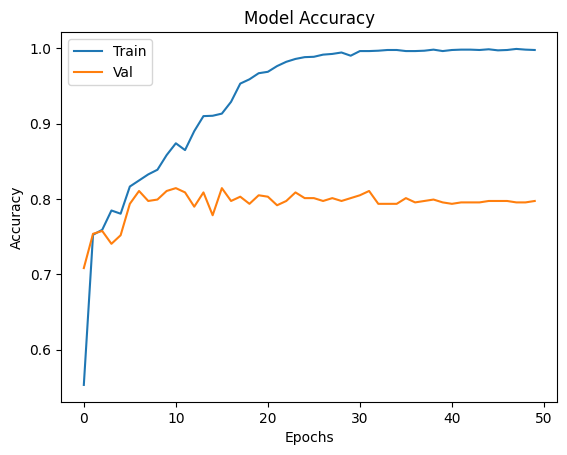

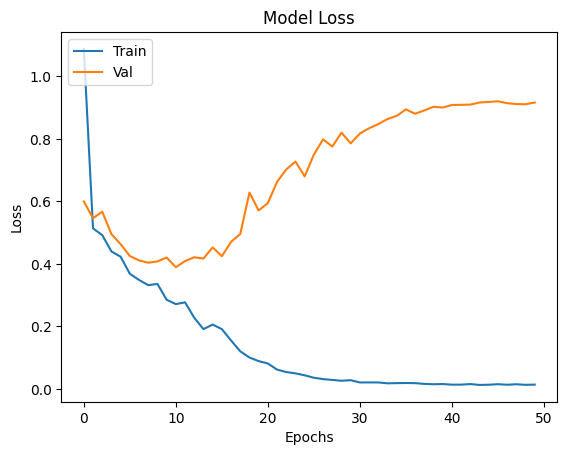

In [21]:
## Summarize model history for accuracy and loss for training and validation

# 1. Accuracy
loaded_model = tf.keras.models.load_model("my_cnn_model.h5")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 2. Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score

# Testing model on test data to evaluate
y_pred = np.argmax(model_cnn.predict(X_test), axis=-1)

print(accuracy_score(np.argmax(y_test, axis=1),y_pred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 581ms/step
0.8272727272727273


In [23]:
y_pred = np.array(y_pred, dtype='uint8')
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

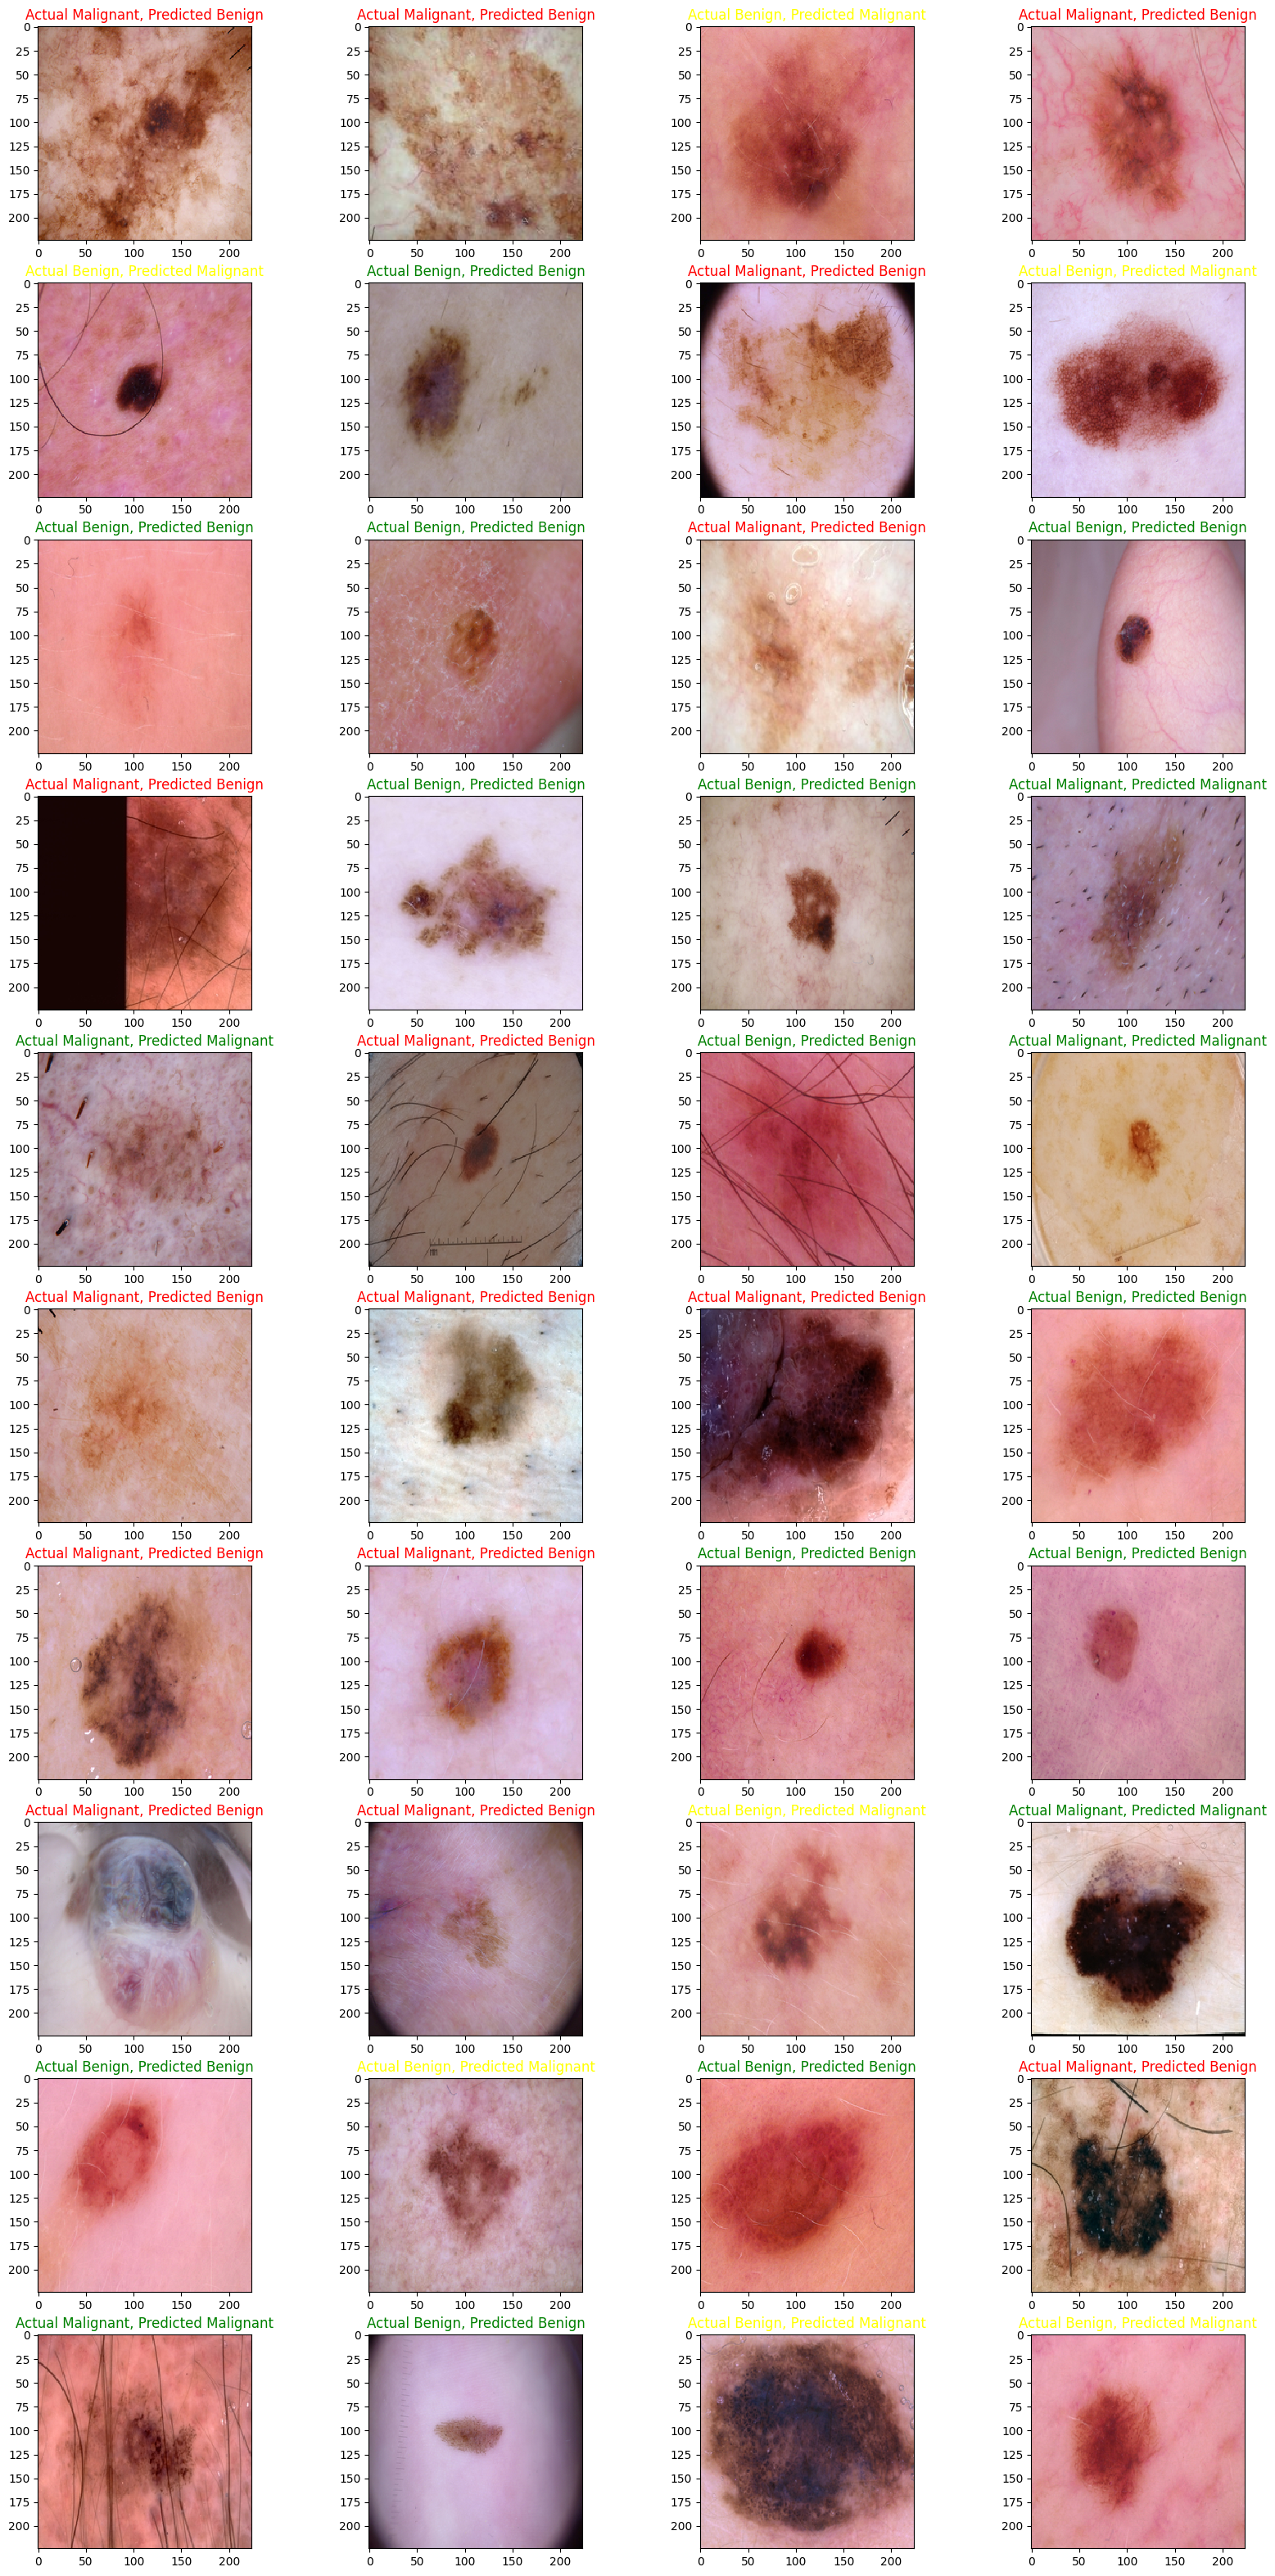

In [24]:
X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

# shuffling data
s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]
y_pred = y_pred[s2]

# plotting
fig = plt.figure(figsize=(20,40))
columns = 4
rows = 10

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_test[i] == 0:
        if y_pred[i] == 0:
            ax.set_title('Actual Benign, Predicted Benign', color='green')
        else:
            ax.set_title('Actual Benign, Predicted Malignant', color='yellow')
    else:
        if y_pred[i] == 1:
            ax.set_title('Actual Malignant, Predicted Malignant', color='green')
        else:
            ax.set_title('Actual Malignant, Predicted Benign', color='red')
    
        
    plt.imshow(X_test[i], interpolation='nearest')
plt.show()

In [25]:
# Load the saved model
loaded_model = tf.keras.models.load_model("my_cnn_model.h5")

In [26]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [27]:
image_path = "data/test/benign/5.jpg"
img = image.load_img(image_path, target_size=(224, 224))  # Adjust target size as needed
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


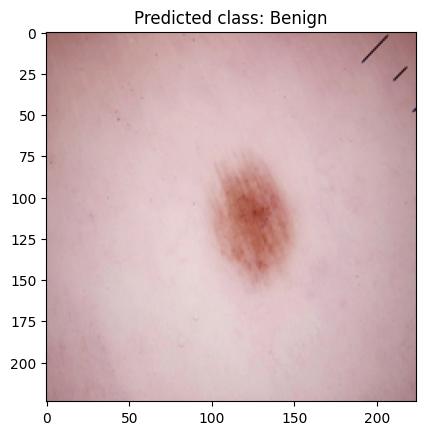

In [28]:

# Make a prediction
predictions = loaded_model.predict(img)

# Interpret the predictions
predicted_class = np.argmax(predictions, axis=1)
if predicted_class == 0:
    prediction_label = "Benign"
else:
    prediction_label = "Malignant"

# Display the image and prediction
plt.imshow(img[0] / 255.0)  # Assuming the image has been normalized to the range [0, 1]
plt.title(f"Predicted class: {prediction_label}")
plt.show()